In [1]:
# E4896_L06_lpc_diary
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np
import scipy
import librosa

from IPython.lib.display import Audio

import zplane
import lpc

In [12]:
d, sr = librosa.load('sm1_cln.wav', sr=8000)
print d.shape
print sr
Audio(d, rate=sr*2)

(27802,)
8000


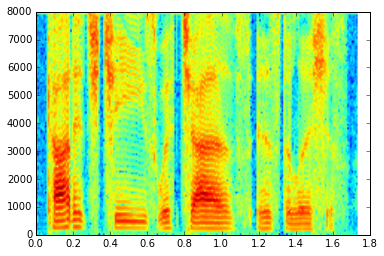

In [13]:
_ = specgram(d, 256, sr*2)

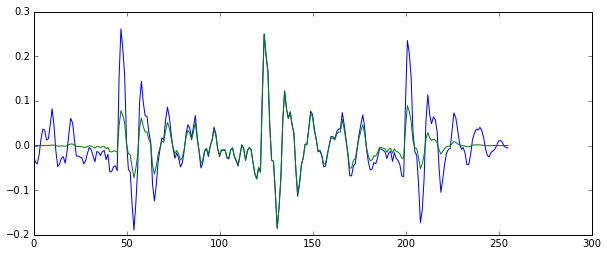

In [7]:
win = 256
dd = d[15000 + np.arange(win)]
wdd = np.hanning(win)*dd
plt.figure(figsize=(10, 4))
plot(np.arange(win), dd, np.arange(win), wdd)

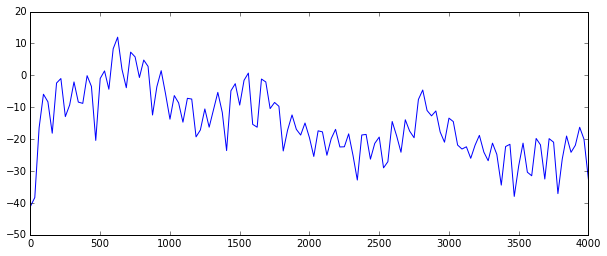

In [8]:
WDD = np.abs(np.fft.fft(wdd))[:129]
plt.figure(figsize=(10, 4))
plot(np.arange(129)*sr/256, 20*np.log10(WDD))

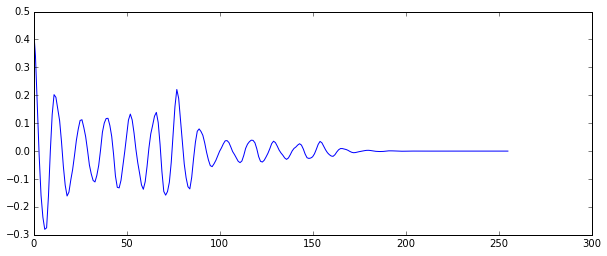

In [34]:
order = 96
rxx = np.correlate(wdd, wdd, 'full')
# Keep only for lags >= 0.
rxx = rxx[255:]
plt.figure(figsize=(10, 4))
plot(rxx)

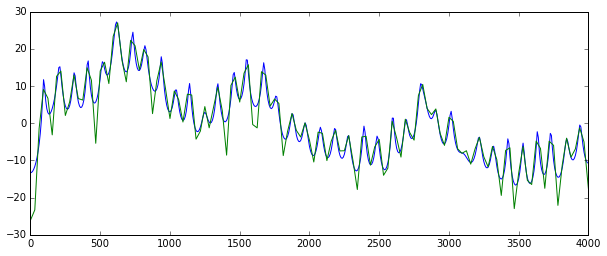

In [35]:
coeffs = np.dot(np.linalg.inv(scipy.linalg.toeplitz(rxx[:order])), rxx[1 : order + 1])
aa = np.hstack([1, -coeffs])
[W, H] = scipy.signal.freqz(1, aa)
plt.figure(figsize=(10, 4))
plot(W*sr/2/np.pi, 20*np.log10(np.abs(H)), np.arange(129)*sr/256, 20*np.log10(WDD)+15)

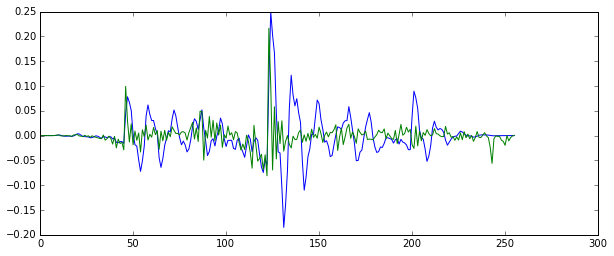

In [36]:
rdd = scipy.signal.lfilter(aa, 1 ,wdd)
plt.figure(figsize=(10, 4))
plot(np.arange(256), wdd, np.arange(256), rdd*2)

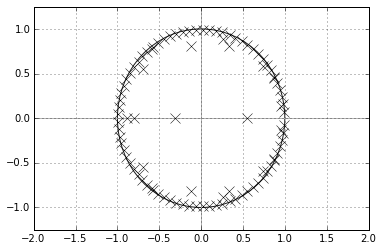

In [37]:
_ = zplane.zplane(np.roots([]), np.roots(aa))

In [57]:
[a, g, e] = lpc.lpcfit(d, 8)

In [46]:
print a.shape


(217, 97)


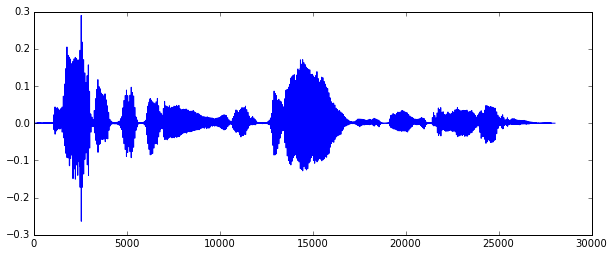

In [49]:
rd = lpc.lpcsynth(a, g, 64)
plt.figure(figsize=(10, 4))
plot(rd)

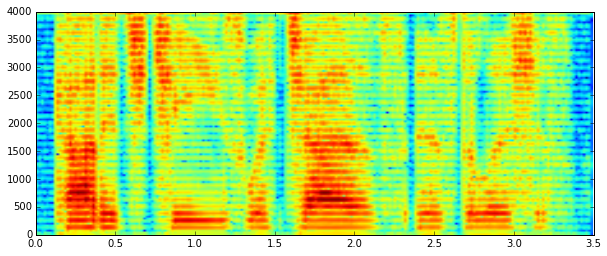

In [50]:
plt.figure(figsize=(10, 4))
_ = specgram(rd, Fs=sr)

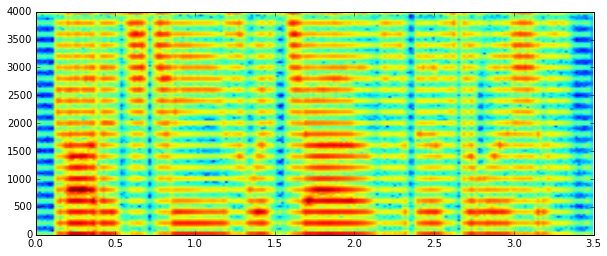

In [28]:
plt.figure(figsize=(10, 4))
_ = specgram(rd, Fs=sr)

In [51]:
Audio(rd, rate=sr)

In [38]:
reload(lpc)

<module 'lpc' from 'lpc.py'>

In [58]:
bh = lpc.lpcBHenc(e)

(217,)


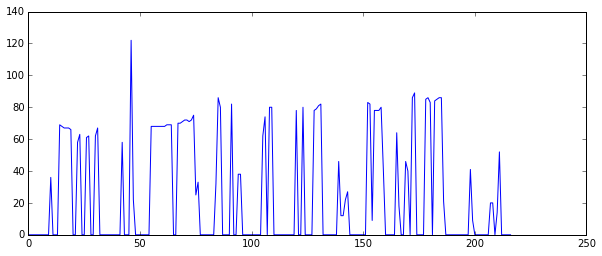

In [59]:
plt.figure(figsize=(10, 4))
print(bh.shape)
plot(bh)

In [60]:
er = lpc.lpcBHdec(bh)

In [61]:
Audio(er, rate=sr)

In [62]:
rde = lpc.lpcsynth(a, g, er)
Audio(rde, rate=sr)
